In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
n = 2000
h = 1973.0
m = 0.511e6
e = 3.795
a = np.zeros([n, n])
r_max = 100
dd = np.linspace(1e-12, r_max, n+1)
d = dd[2]-dd[1]

f = -(h**2)/(2*m*(d**2))


def V(e, r): return -(e**2)/r


for i in range(n):
    a[i][i] = -2*f + V(e, dd[i+1])
    if (i == 0):
        a[i][i+1] = 1*f
    elif (i == n-1):
        a[i][i-1] = 1*f
    else:
        a[i][i-1] = 1*f
        a[i][i+1] = 1*f
evalue, evec = np.linalg.eigh(a)
for i in range(3):
    print("eigen energy:", i+1, ":", evalue[i])
# print(evec.T[0])


eigen energy: 1 : -13.583663866880446
eigen energy: 2 : -3.4015865499738562
eigen energy: 3 : -1.512284808866922


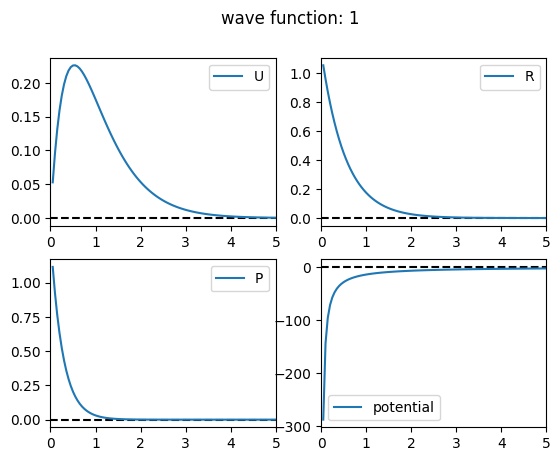

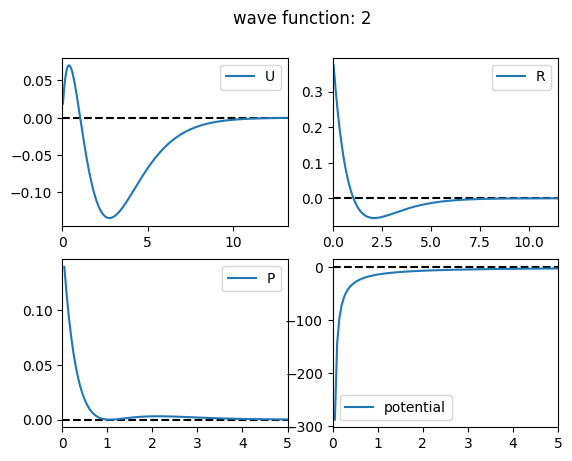

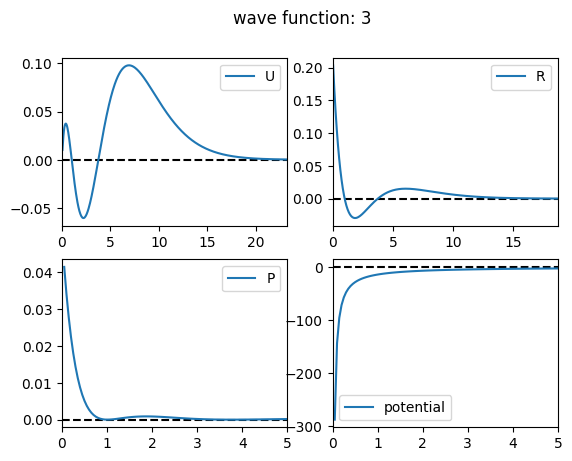

In [3]:
dd1 = np.linspace(d, r_max, n)

for w in range(3):
    U = (-1)**(w+1)*evec.T[w]
    R_ = U/dd1
    P_d = R_**2
    plt.subplot(2, 2, 1)
    plt.axhline(y=0, c="black", linestyle="dashed")
    plt.plot(dd1, U, label="U")
    plt.xlim([0, 5*(w+1)**1.4])
    plt.legend(loc="best")
    plt.subplot(2, 2, 2)
    plt.axhline(y=0, c="black", linestyle="dashed")
    plt.plot(dd1, R_, label="R")
    plt.xlim([0, 5*(w+1)**1.2])
    plt.legend(loc="best")
    plt.subplot(2, 2, 3)
    plt.axhline(y=0, c="black", linestyle="dashed")
    plt.plot(dd1, P_d, label="P")
    plt.xlim([0, 5])
    plt.legend(loc="best")
    plt.subplot(2, 2, 4)
    plt.axhline(y=0, c="black", linestyle="dashed")
    plt.plot(dd1, V(e, dd1), label="potential")
    plt.xlim([0, 5])
    plt.legend(loc="best")
    plt.suptitle(f"wave function: {w+1}")

    plt.show()
